In [364]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# Spotify

In [365]:
# Read the spotify dataset
spotify_df = pd.read_csv('dataset.csv')
spotify_df.head(10)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
5,5,01MVOl9KtVTNfFiBU9I7dc,Tyrone Wells,Days I Will Remember,Days I Will Remember,58,214240,False,0.688,0.4810,...,-8.807,1,0.1050,0.2890,0.000000,0.1890,0.6660,98.017,4,acoustic
6,6,6Vc5wAMmXdKIAM7WUoEb7N,A Great Big World;Christina Aguilera,Is There Anybody Out There?,Say Something,74,229400,False,0.407,0.1470,...,-8.822,1,0.0355,0.8570,0.000003,0.0913,0.0765,141.284,3,acoustic
7,7,1EzrEOXmMH3G43AXT1y7pA,Jason Mraz,We Sing. We Dance. We Steal Things.,I'm Yours,80,242946,False,0.703,0.4440,...,-9.331,1,0.0417,0.5590,0.000000,0.0973,0.7120,150.960,4,acoustic
8,8,0IktbUcnAGrvD03AWnz3Q8,Jason Mraz;Colbie Caillat,We Sing. We Dance. We Steal Things.,Lucky,74,189613,False,0.625,0.4140,...,-8.700,1,0.0369,0.2940,0.000000,0.1510,0.6690,130.088,4,acoustic
9,9,7k9GuJYLp2AzqokyEdwEw2,Ross Copperman,Hunger,Hunger,56,205594,False,0.442,0.6320,...,-6.770,1,0.0295,0.4260,0.004190,0.0735,0.1960,78.899,4,acoustic


## Preprocessing

In [366]:
# Drop the first columns
spotify_df.drop(columns=spotify_df.columns[0], axis=1, inplace=True)

In [367]:
# Remove unused columns
unused_col = ['track_id', 'artists', 'album_name', 'track_name', 'mode', 'time_signature', 'instrumentalness', 'duration_ms']
spotify_df = spotify_df.drop(columns=unused_col)

In [368]:
# Remove more columns
spotify_df = spotify_df[['popularity', 'explicit', 'track_genre']]

In [369]:
spotify_df.head(10)

,popularity,explicit,track_genre
0,73,False,acoustic
1,55,False,acoustic
2,57,False,acoustic
3,71,False,acoustic
4,82,False,acoustic
5,58,False,acoustic
6,74,False,acoustic
7,80,False,acoustic
8,74,False,acoustic
9,56,False,acoustic


In [370]:
# Check if dataset contain any null value
spotify_df.isnull().values.any()

False

In [371]:
# Inspect dataset structure
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   popularity   114000 non-null  int64 
 1   explicit     114000 non-null  bool  
 2   track_genre  114000 non-null  object
dtypes: bool(1), int64(1), object(1)
memory usage: 1.8+ MB


In [373]:
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22800 entries, 0 to 113199
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   popularity   22800 non-null  int64 
 1   explicit     22800 non-null  bool  
 2   track_genre  22800 non-null  object
dtypes: bool(1), int64(1), object(1)
memory usage: 556.6+ KB


In [374]:
# Check columns number of unique values
spotify_df.nunique()

popularity      99
explicit         2
track_genre    114
dtype: int64

In [375]:
# Get all track_genre columns unique values
spotify_df['track_genre'].unique().tolist()

['acoustic',
 'afrobeat',
 'alt-rock',
 'alternative',
 'ambient',
 'anime',
 'black-metal',
 'bluegrass',
 'blues',
 'brazil',
 'breakbeat',
 'british',
 'cantopop',
 'chicago-house',
 'children',
 'chill',
 'classical',
 'club',
 'comedy',
 'country',
 'dance',
 'dancehall',
 'death-metal',
 'deep-house',
 'detroit-techno',
 'disco',
 'disney',
 'drum-and-bass',
 'dub',
 'dubstep',
 'edm',
 'electro',
 'electronic',
 'emo',
 'folk',
 'forro',
 'french',
 'funk',
 'garage',
 'german',
 'gospel',
 'goth',
 'grindcore',
 'groove',
 'grunge',
 'guitar',
 'happy',
 'hard-rock',
 'hardcore',
 'hardstyle',
 'heavy-metal',
 'hip-hop',
 'honky-tonk',
 'house',
 'idm',
 'indian',
 'indie-pop',
 'indie',
 'industrial',
 'iranian',
 'j-dance',
 'j-idol',
 'j-pop',
 'j-rock',
 'jazz',
 'k-pop',
 'kids',
 'latin',
 'latino',
 'malay',
 'mandopop',
 'metal',
 'metalcore',
 'minimal-techno',
 'mpb',
 'new-age',
 'opera',
 'pagode',
 'party',
 'piano',
 'pop-film',
 'pop',
 'power-pop',
 'progressive

In [376]:
# Get only certain track genres 
filter_genre = ['acoustic', 'indie', 'spanish', 'sad', 'hip-hop']
spotify_df = spotify_df[spotify_df['track_genre'].isin(filter_genre)]

In [377]:
spotify_df['track_genre'].unique().tolist()

['acoustic', 'hip-hop', 'indie', 'sad', 'spanish']

In [378]:
spotify_df.reset_index(drop=True, inplace=True)

In [379]:
# Change the explicit columns to intergers
# It only has two unique values: TRUE, FALSE
explicit_dict = {'FALSE': 0, 'TRUE': 1}
spotify_df['explicit'] = spotify_df['explicit'].replace(explicit_dict).astype(int)

In [380]:
spotify_df.head(10)

,popularity,explicit,track_genre
0,73,0,acoustic
1,55,0,acoustic
2,57,0,acoustic
3,71,0,acoustic
4,82,0,acoustic
5,58,0,acoustic
6,74,0,acoustic
7,80,0,acoustic
8,74,0,acoustic
9,56,0,acoustic


In [381]:
# Check explicit unique values still remain at 2
spotify_df['explicit'].nunique()

2

## Classfication

In [382]:
# Get the data and labels 
data = spotify_df.drop(columns='track_genre')
labels = spotify_df['track_genre']

In [383]:
labels.unique()

array(['acoustic', 'hip-hop', 'indie', 'sad', 'spanish'], dtype=object)

In [384]:
data.nunique()

popularity    76
explicit       2
dtype: int64

In [385]:
print(labels.shape, data.shape)

(1000,) (1000, 2)


In [386]:
# split the dataset
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

### Classification with KNN

In [387]:
# Model
model_knn = KNeighborsClassifier(n_neighbors=3)

In [388]:
# Fit
model_knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [389]:
knn_predict = model_knn.predict(x_test)

In [390]:
acc = round(accuracy_score(y_test, knn_predict), 2)
prs = round(precision_score(y_test, knn_predict, average='macro'), 2)
rll = round(recall_score(y_test, knn_predict, average='macro'), 2)
f1 = round(f1_score(y_test, knn_predict, average='macro'), 2)

In [391]:
print(f'Accuracy Score: {acc}\nPrecision Score: {prs} \nRecall Score: {rll} \nF1 Score: {f1}')

Accuracy Score: 0.42
Precision Score: 0.52 
Recall Score: 0.41 
F1 Score: 0.41


In [392]:
print(classification_report(y_test, knn_predict))

              precision    recall  f1-score   support

    acoustic       0.30      0.33      0.31        33
     hip-hop       0.57      0.77      0.65        48
       indie       0.22      0.41      0.28        37
         sad       0.79      0.29      0.42        38
     spanish       0.73      0.25      0.37        44

    accuracy                           0.42       200
   macro avg       0.52      0.41      0.41       200
weighted avg       0.54      0.42      0.42       200



### DecisionTree Classfication

In [393]:
# Model
model_dt = DecisionTreeClassifier(random_state=0)

In [394]:
# Fit
model_dt.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [395]:
# Predict
dt_predict = model_dt.predict(x_test)

In [396]:
acc = round(accuracy_score(y_test, dt_predict), 2)
prs = round(precision_score(y_test, dt_predict, average='macro'), 2)
rll = round(recall_score(y_test, dt_predict, average='macro'), 2)
f1 = round(f1_score(y_test, dt_predict, average='macro'), 2)

In [397]:
print(f'Accuracy Score: {acc}\nPrecision Score: {prs} \nRecall Score: {rll} \nF1 Score: {round(f1, 2)}')

Accuracy Score: 0.52
Precision Score: 0.49 
Recall Score: 0.49 
F1 Score: 0.46


In [398]:
print(classification_report(y_test, dt_predict))

              precision    recall  f1-score   support

    acoustic       0.32      0.18      0.23        33
     hip-hop       0.55      0.88      0.68        48
       indie       0.38      0.35      0.37        37
         sad       0.53      0.24      0.33        38
     spanish       0.65      0.80      0.71        44

    accuracy                           0.53       200
   macro avg       0.49      0.49      0.46       200
weighted avg       0.50      0.53      0.49       200



## Confusion Matrix

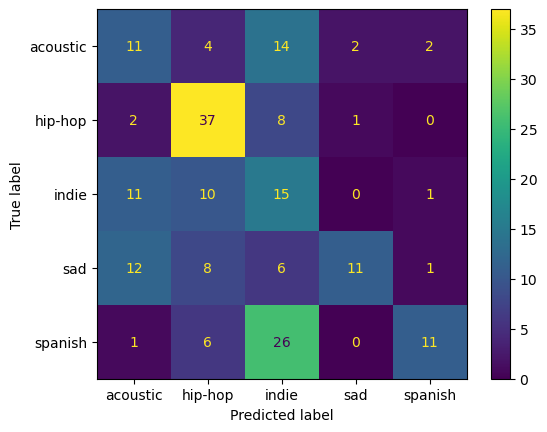

In [399]:
# KNN Confusion Matrix
cm = confusion_matrix(y_test, knn_predict, labels=model_knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_knn.classes_)
disp.plot()
plt.show()

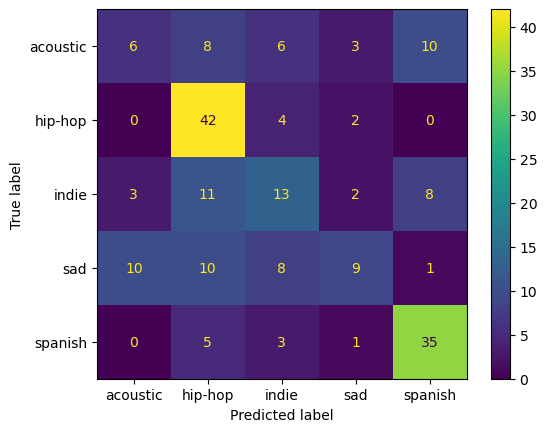

In [400]:
# DecisionTree Confusion Matrix
cm = confusion_matrix(y_test, dt_predict, labels=model_dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_dt.classes_)
disp.plot()
plt.show()